In [2]:
%matplotlib inline
import torch
import random
from d2l import torch as d2l

## 1. 生成数据集

In [8]:
def synthetic_data(w, b, num_example):
    X = torch.normal(0, 1, (num_example, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

In [9]:
true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [11]:
features, labels

(tensor([[-0.3924,  0.6406],
         [-0.0409, -1.7317],
         [ 0.4045, -0.0185],
         ...,
         [ 0.7924, -0.2175],
         [ 1.2988, -1.3359],
         [ 0.2704,  0.0546]]),
 tensor([[  1.2306],
         [ 10.0042],
         [  5.0580],
         [ 13.3786],
         [  5.9606],
         [ -0.1522],
         [  9.4640],
         [  3.0683],
         [  3.0098],
         [ -0.1708],
         [  2.9659],
         [  2.9013],
         [ 13.0925],
         [  7.0776],
         [  7.3710],
         [ 11.2194],
         [ 10.6109],
         [  6.6647],
         [  6.6651],
         [  6.1373],
         [  0.6880],
         [  2.9091],
         [  3.0026],
         [  1.2924],
         [  5.9764],
         [ 10.1040],
         [  6.5563],
         [ -3.6296],
         [  8.2550],
         [ 10.1924],
         [  1.7228],
         [  6.8635],
         [  4.0937],
         [ 14.9818],
         [  2.4809],
         [  1.2195],
         [ -2.4854],
         [  9.0932],
         [  

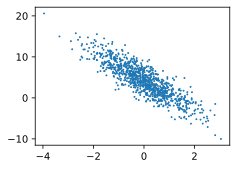

In [12]:
d2l.set_figsize()
d2l.plt.scatter(features[:, (1)].detach().numpy(), labels.detach().numpy(), 1);

## 2. 读取数据集

In [15]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)]
        )
        yield features[batch_indices], labels[batch_indices]

In [16]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)

tensor([[ 1.7238, -0.3643],
        [ 0.5471,  2.7942],
        [ 0.4372,  2.2916],
        [ 0.5994, -2.2620],
        [ 0.0045,  0.0543],
        [ 0.4126, -0.3234],
        [ 1.8237, -0.4787],
        [ 1.0139,  0.4991],
        [-0.6356, -0.5088],
        [-0.3897,  1.6709]]) 
 tensor([[ 8.8838],
        [-4.2031],
        [-2.7345],
        [13.0925],
        [ 4.0107],
        [ 6.1373],
        [ 9.4666],
        [ 4.5336],
        [ 4.6644],
        [-2.2347]])
tensor([[-0.8012, -0.6472],
        [-0.7286,  0.6163],
        [-0.3078,  0.6327],
        [ 0.5717,  1.4921],
        [-0.2115,  0.0826],
        [ 1.2653,  1.4563],
        [-0.5150, -0.2507],
        [-0.7759,  0.0625],
        [ 0.3547,  1.5980],
        [-0.4828, -0.7020]]) 
 tensor([[ 4.8083],
        [ 0.6379],
        [ 1.4345],
        [ 0.2718],
        [ 3.4995],
        [ 1.7682],
        [ 4.0278],
        [ 2.4253],
        [-0.5208],
        [ 5.6207]])
tensor([[-0.2336,  0.6393],
        [-1.4668, -1.199

## 3. 初始化模型参数

In [18]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad = True)
b = torch.zeros(1, requires_grad = True)

## 4. 定义模型

In [20]:
def linreg(X, w, b):
    return torch.matmul(X, w) + b

##  5. 定义损失函数

In [21]:
def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

## 6. 定义优化算法 

In [22]:
def sgd(params, lr, batch_size):
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [23]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

In [30]:
for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)
        l.sum().backward()
        sgd([w, b], lr, batch_size)
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.029255
epoch 2, loss 0.000095
epoch 3, loss 0.000048


# 简洁实现

In [32]:
import numpy as np
import torch
from torch.utils import data
from d2l import torch as d2l

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = d2l.synthetic_data(true_w, true_b, 1000)

In [34]:
def load_array(data_arrays, batch_size, is_train=True):
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)

In [35]:
batch_size = 10
data_iter = load_array((features, labels), batch_size)

In [37]:
next(iter(data_iter))

[tensor([[-1.1342,  0.7070],
         [ 0.0940, -0.4585],
         [-1.0230, -0.2518],
         [ 1.5011,  1.2596],
         [ 1.4759,  0.5768],
         [ 0.6584, -0.8846],
         [-2.1353, -0.5370],
         [-1.3391,  1.0906],
         [-0.8461, -1.1030],
         [-1.6877, -0.2384]]),
 tensor([[-0.4952],
         [ 5.9658],
         [ 3.0108],
         [ 2.9186],
         [ 5.1811],
         [ 8.5176],
         [ 1.7470],
         [-2.1725],
         [ 6.2694],
         [ 1.6300]])]

In [38]:
from torch import nn

net = nn.Sequential(nn.Linear(2, 1))

In [40]:
net[0].weight.data.normal_(0, 0.01)
net[0].bias.data.fill_(0)

tensor([0.])

In [45]:
loss = nn.MSELoss()

In [49]:
trainer = torch.optim.SGD(net.parameters(), lr=0.03)

In [50]:
num_epochs = 3
for epoch in range(num_epochs):
    for X, y in data_iter:
        l = loss(net(X), y)
        trainer.zero_grad()
        l.backward()
        trainer.step()
    l = loss(net(features), labels)
    print(f'epoch {epoch + 1}, loss {l:f}')

epoch 1, loss 0.000250
epoch 2, loss 0.000106
epoch 3, loss 0.000105
